In [ ]:
import numpy as np
import pandas as pd

from algorithms.linear_regression import (
    train_test_split,
    LinearReg,
    plot_loss_curve,
    plot_2d_regression,
    plot_2d_slice,
)

# ── Toy “compile-time” dataset (CPU GHz, RAM GB → time [s]) ──────────
data = np.array(
    [
        [2.0, 4, 48],
        [2.2, 4, 45],
        [2.4, 8, 39],
        [2.5, 8, 38],
        [2.7, 16, 32],
        [3.0, 16, 29],
        [3.2, 32, 25],
        [3.4, 32, 23],
        [3.6, 32, 22],
        [3.8, 32, 21],
    ]
)

X, y = data[:, :2], data[:, 2]
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_ratio=0.3)

print("Train-shape:", X_tr.shape, "  Test-shape:", X_te.shape)

In [ ]:
model_cf = LinearReg(method="normal").fit(X_tr, y_tr)

print("θ (closed form) =", model_cf.theta_)
print("R² train =", model_cf.score_R2(X_tr, y_tr).round(3))
print("R² test  =", model_cf.score_R2(X_te, y_te).round(3))

θ (closed form): [ 7.71507334e+01 -1.50682853e+01 -4.02756702e-02]
R² train: 0.9768591112609828
R² test : 0.7513681944165531


epoch 20    loss=53895890385673750601502898176086243278848.0000
epoch 40    loss=6421527284710854562726458890602186589982711839331951420601282226249107079430144.0000
epoch 60    loss=765104952774788478014180185106701417152524996309362835692324420806361963533237682618510845486882926757434140999548928.0000
epoch 80    loss=91159869421448659567600934208419906228297017179137551161161463976719567649900446850455497309910818067863701119844876736891347136532072469587076224154337280.0000
epoch 100   loss=10861414192650866233625679000756002283192852829546271201308303187678020357350235618338413881221489468814599269763320360914991663884980537419165211518587539828596583428779084297094893046989848576.0000
epoch 120   loss=1294103633682488042110467665548661808621500271841153172839923448271446393125685937157689749159316317428445239540074380039604603316041818791056668304617842936747615745188138470853423815729475975612720220584022913354801803837086629888.0000
epoch 140   loss=154188412761513753820966859

/Users/jovanp./Projects/college/data_mining_scripts/algorithms/linear_regression.py:59: RuntimeWarning: overflow encountered in square
  loss = np.mean((Xb @ self.theta_ - y) ** 2)


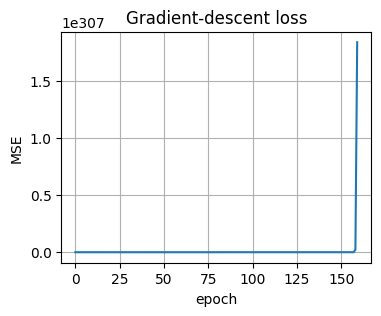

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)

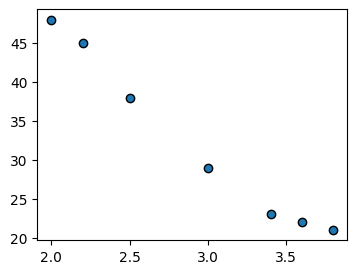

In [ ]:
model_gd = LinearReg(
    method="gd",
    lr=0.01,
    epochs=300,
    batch=None,  # full GD
    verbose=True,  # prints every 10 % epochs
).fit(X_tr, y_tr)

plot_loss_curve(model_gd)

In [ ]:
ram_const = X_tr[:, 1].mean()  # fiksiraj RAM na prosjek (~16 GB)

plot_2d_slice(
    model_gd,
    X_tr,
    y_tr,
    vary_index=0,  # feature 0 = CPU GHz
    const_vals={1: ram_const},  # RAM konstanta
    title=f"CPU freq vs Compile time  (RAM = {ram_const:.1f} GB)",
)

In [ ]:
new_spec = np.array([[3.1, 12]])  # 3.1 GHz / 12 GB
pred_sec = model_cf.predict(new_spec)[0]

print(
    f"Predicted compile-time for {new_spec[0,0]} GHz / {new_spec[0,1]} GB:",
    f"{pred_sec:.1f} s",
)